Building Ensemble Network of QCNN's

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
def qcnn_circuit_1():
    qc = QuantumCircuit(4)

    # Encoding layer
    for i in range(4):
        pixel_param = Parameter(f'pixel_{i}')
        qc.ry(pixel_param, i)

    # First convolutional layer
    for i in range(4):
        theta = Parameter(f'theta_conv1_{i}')
        qc.ry(theta, i)

    # Entanglement
    for i in range(4):
        qc.cx(i, (i+1) % 4)

    # First pooling layer
    theta_p1 = Parameter('theta_pool1_0')
    qc.crz(theta_p1, 0, 2)
    qc.cx(0, 2)
    theta_p2 = Parameter('theta_pool1_1')
    qc.crz(theta_p2, 0, 2)

    theta_p3 = Parameter('theta_pool1_2')
    qc.crz(theta_p3, 1, 3)
    qc.cx(1, 3)
    theta_p4 = Parameter('theta_pool1_3')
    qc.crz(theta_p4, 1, 3)

    # Second convolutional layer
    theta_c1 = Parameter('theta_conv2_0')
    theta_c2 = Parameter('theta_conv2_1')
    qc.ry(theta_c1, 2)
    qc.ry(theta_c2, 3)

    # Entanglement
    qc.cx(2, 3)
    qc.cx(3, 2)

    # Second pooling layer
    theta_p5 = Parameter('theta_pool2_0')
    qc.crz(theta_p5, 2, 3)
    qc.cx(2, 3)
    theta_p6 = Parameter('theta_pool2_1')
    qc.crz(theta_p6, 2, 3)

    # Final rotation
    theta_f = Parameter('theta_final')
    qc.ry(theta_f, 3)

    return qc


def qcnn_circuit_2():

  qc = QuantumCircuit(4)

  # Input encoding layer
  for i in range(4):
      pixel_param = Parameter(f'pixel_{i}')
      qc.ry(pixel_param, i)

  # First convolutional layer
  for i in range(4):
      theta = Parameter(f'theta_conv1_{i}')
      qc.rx(theta, i)

  # Entanglement
  for i in range(4):
      qc.cx(i, (i+1) % 4)

  # First pooling layer
  theta_p1 = Parameter('theta_pool1_0')
  qc.crz(theta_p1, 0, 2)
  qc.cx(0, 2)
  theta_p2 = Parameter('theta_pool1_1')
  qc.crz(theta_p2, 0, 2)

  theta_p3 = Parameter('theta_pool1_2')
  qc.crz(theta_p3, 1, 3)
  qc.cx(1, 3)
  theta_p4 = Parameter('theta_pool1_3')
  qc.crz(theta_p4, 1, 3)

  # Second convolutional layer
  theta_c1 = Parameter('theta_conv2_0')
  theta_c2 = Parameter('theta_conv2_1')
  qc.rx(theta_c1, 2)
  qc.rx(theta_c2, 3)

  # Entanglement - different pattern
  qc.cz(2, 3)  # CZ instead of CX
  qc.cz(3, 2)  # CZ instead of CX

  # Second pooling layer
  theta_p5 = Parameter('theta_pool2_0')
  qc.crz(theta_p5, 2, 3)
  qc.cx(2, 3)
  theta_p6 = Parameter('theta_pool2_1')
  qc.crz(theta_p6, 2, 3)

  # Final rotation
  theta_f = Parameter('theta_final')
  qc.rx(theta_f, 3)

  return qc



def create_qcnn_circuit_3():

    qc = QuantumCircuit(4)

    # Input encoding layer
    for i in range(4):
        pixel_param = Parameter(f'pixel_{i}')
        qc.ry(pixel_param, i)

    # First convolutional layer
    for i in range(4):
        theta = Parameter(f'theta_conv1_{i}')
        qc.rz(theta, i)

    # Entanglement - different pattern
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)

    # First pooling layer
    theta_p1 = Parameter('theta_pool1_0')
    qc.crz(theta_p1, 0, 2)
    qc.cx(0, 2)
    theta_p2 = Parameter('theta_pool1_1')
    qc.crz(theta_p2, 0, 2)

    theta_p3 = Parameter('theta_pool1_2')
    qc.crz(theta_p3, 1, 3)
    qc.cx(1, 3)
    theta_p4 = Parameter('theta_pool1_3')
    qc.crz(theta_p4, 1, 3)

    # Second convolutional layer
    theta_c1 = Parameter('theta_conv2_0')
    theta_c2 = Parameter('theta_conv2_1')
    qc.rz(theta_c1, 2)
    qc.rz(theta_c2, 3)

    # Entanglement
    qc.cx(2, 3)
    qc.cx(3, 2)

    # Second pooling layer
    theta_p5 = Parameter('theta_pool2_0')
    qc.crz(theta_p5, 2, 3)
    qc.cx(2, 3)
    theta_p6 = Parameter('theta_pool2_1')
    qc.crz(theta_p6, 2, 3)

    # Final rotation
    theta_f = Parameter('theta_final')
    qc.rz(theta_f, 3)

    return qc

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.6 MB/s eta 0:00:00


## **Model trained and tested on 9 Subjects after Resizing Input Image to 48x48 and using SVM Classifier. Measuring one qubit**



In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject0{i}' for i in range(1, 10)]
    test_ratio = 0.2

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        train_files, test_files = train_test_split(subject_files, test_size=test_ratio, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rz(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rz(Parameter('theta_conv2_0'), 2)
    qc.rz(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rz(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 1)
    meas.compose(bound, inplace=True)
    meas.measure(3, 0)
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

# Change this part in the extract_features_from_image function:
def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        # Create a dictionary binding each pixel value to its corresponding input parameter
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        # Add the weight parameters to the bindings dictionary
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 1)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure(3, 0)
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        zero = counts.get('0', 0)
        one = counts.get('1', 0)
        expectation = (zero - one) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            prob_one = counts.get('1', 0) / 1024
            image_cost += (1 - prob_one)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.0.2
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (72, 576, 4)
Shape of y_train: (72,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 9 classes
SVM Classifier trained for 9 classes
SVM Classifier trained for 9 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 85.18518518518519
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       0.67      0.67      0.67         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3


# **Measuring 2 Qubits for 15 Subjects got an accuracy of 80% for 64x64 input**

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 2

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((64, 64))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 64, 2) for j in range(0, 64, 2) if i+2 <= 64 and j+2 <= 64]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rz(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rz(Parameter('theta_conv2_0'), 2)
    qc.rz(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rz(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 2)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2], [0, 1])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

# Change this part in the extract_features_from_image function:
def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        # Create a dictionary binding each pixel value to its corresponding input parameter
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        # Add the weight parameters to the bindings dictionary
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 2)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2], [0, 1])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        c00 = counts.get('00', 0)
        c01 = counts.get('01', 0)
        c10 = counts.get('10', 0)
        c11 = counts.get('11', 0)
        expectation = (c00 + c11 - c01 - c10) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            # Calculate expectation value for Z_3 Z_2
            c00 = counts.get("00", 0)
            c01 = counts.get("01", 0)
            c10 = counts.get("10", 0)
            c11 = counts.get("11", 0)
            expectation = (c00 + c11 - c01 - c10) / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (135, 1024, 4)
Shape of y_train: (135,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 80.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.25      0.50      0.33         2
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2
       

# **Achieved 80% for 48x48 inputs with 3 qubit measurement with 15 classes**

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle



def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0) # Circular entanglement
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.crx(Parameter('theta_crx_0'), 2, 3)
    qc.crx(Parameter('theta_crx_1'), 3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 3)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1], [0, 1, 2])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 3)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1], [0, 1, 2])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Compute expectation value for Z⊗Z⊗Z on qubits 3,2,1
        expectation = 0
        for bitstring, count in counts.items():
            bit_values = [1 if b == '0' else -1 for b in bitstring]
            zz_product = bit_values[0] * bit_values[1] * bit_values[2]
            expectation += zz_product * count / 1024

        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            expectation = 0
            for bitstring, count in counts.items():
              if len(bitstring) < 3:
                continue
              bit_values = [1 if b == '0' else -1 for b in bitstring[:3]]
              zz_product = bit_values[0] * bit_values[1] * bit_values[2]
              expectation += zz_product * count / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 3-Qubit QCNN Ensemble for 15-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 3-Qubit QCNN Ensemble for 15-Class Classification
Shape of X_train: (120, 576, 4)
Shape of y_train: (120,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 80.0
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         3
           6       1.00      0.67      0.80         3
           7       0.50      0.33      0.40         3
       

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.2 MB/s eta 0:00:00


# **4x48 input for 15 classes classification by measuring 4 qubits**

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle



def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rz(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rz(Parameter('theta_conv2_0'), 2)
    qc.rz(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rz(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 4)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1, 0], [0, 1, 2, 3])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 4)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1, 0], [0, 1, 2, 3])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Compute expectation value for Z⊗Z⊗Z⊗Z on qubits 3,2,1,0
        expectation = 0
        for bitstring, count in counts.items():
            bit_values = [1 if b == '0' else -1 for b in bitstring]
            zz_product = bit_values[0] * bit_values[1] * bit_values[2] * bit_values[3]
            expectation += zz_product * count / 1024

        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            expectation = 0
            for bitstring, count in counts.items():
              if len(bitstring) < 4:
                continue
              bit_values = [1 if b == '0' else -1 for b in bitstring[:4]]
              zz_product = bit_values[0] * bit_values[1] * bit_values[2] * bit_values[3]
              expectation += zz_product * count / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 3-Qubit QCNN Ensemble for 15-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 3-Qubit QCNN Ensemble for 15-Class Classification
Shape of X_train: (120, 576, 4)
Shape of y_train: (120,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 75.55555555555556
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.33      0.50         3
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       0.60      1.00      0.75         3
           6       1.00      0.67      0.80         3
           7       0.50      0.67      0.57     

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 114.8 MB/s eta 0:00:00


# **7 Subjects with 64x64 input and 75 iterations**

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 8)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i) # Changed rz to rx
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0) # Circular entanglement
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2) # Changed rz to rx
    qc.rx(Parameter('theta_conv2_1'), 3) # Changed rz to rx
    qc.crx(Parameter('theta_crx_0'), 2, 3) # Changed cx to crx
    qc.crx(Parameter('theta_crx_1'), 3, 2) # Changed cx to crx
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3) # Changed rz to rx
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 2)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2], [0, 1])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

# Change this part in the extract_features_from_image function:
def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        # Create a dictionary binding each pixel value to its corresponding input parameter
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        # Add the weight parameters to the bindings dictionary
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 2)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2], [0, 1])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        c00 = counts.get('00', 0)
        c01 = counts.get('01', 0)
        c10 = counts.get('10', 0)
        c11 = counts.get('11', 0)
        expectation = (c00 + c11 - c01 - c10) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            # Calculate expectation value for Z_3 Z_2
            c00 = counts.get("00", 0)
            c01 = counts.get("01", 0)
            c10 = counts.get("10", 0)
            c11 = counts.get("11", 0)
            expectation = (c00 + c11 - c01 - c10) / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (56, 1024, 4)
Shape of y_train: (56,)
Training QCNN 1...


KeyboardInterrupt: 

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle
import matplotlib.pyplot as plt


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 8)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rz(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rz(Parameter('theta_conv2_0'), 2)
    qc.rz(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rz(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 2)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2], [0, 1])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

# Change this part in the extract_features_from_image function:
def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        # Create a dictionary binding each pixel value to its corresponding input parameter
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        # Add the weight parameters to the bindings dictionary
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 2)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2], [0, 1])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        c00 = counts.get('00', 0)
        c01 = counts.get('01', 0)
        c10 = counts.get('10', 0)
        c11 = counts.get('11', 0)
        expectation = (c00 + c11 - c01 - c10) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    # Calculate and return training accuracy
    y_pred_train = clf.predict(X_features_reshaped)
    train_accuracy = accuracy_score(y_labels, y_pred_train)
    return clf, train_accuracy

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            # Calculate expectation value for Z_3 Z_2
            c00 = counts.get("00", 0)
            c01 = counts.get("01", 0)
            c10 = counts.get("10", 0)
            c11 = counts.get("11", 0)
            expectation = (c00 + c11 - c01 - c10) / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi

    cost_history = []

    def callback_function(current_params):
        current_cost = cost_function(current_params, circuit, input_params, weight_params, X_train, y_train, backend)
        cost_history.append(current_cost)
        print(f"Current cost: {current_cost}")

    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter}, callback=callback_function)
    return result.x, cost_history

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def plot_cost_history(cost_history, title='QCNN Cost Function History', filename='cost_history.png'):
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history, marker='o')
    plt.title(title)
    plt.xlabel('Optimization Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.savefig(filename)
    plt.close()

def plot_accuracy_history(accuracy_history, title='Classifier Training Accuracy', filename='training_accuracy.png'):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(accuracy_history)), [acc * 100 for acc in accuracy_history])
    plt.title(title)
    plt.xlabel('Classifier Index')
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y')
    plt.savefig(filename)
    plt.close()

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()

    all_cost_histories = []
    all_training_accuracies = []

    print("Training QCNN 1...")
    params1, cost_history1 = train_qcnn(circuit1, X_train, y_train, backend)
    all_cost_histories.append(cost_history1)
    print("Training QCNN 2...")
    params2, cost_history2 = train_qcnn(circuit2, X_train, y_train, backend)
    all_cost_histories.append(cost_history2)
    print("Training QCNN 3...")
    params3, cost_history3 = train_qcnn(circuit3, X_train, y_train, backend)
    all_cost_histories.append(cost_history3)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1, acc1 = train_classifier(feat1, y_train)
    all_training_accuracies.append(acc1)
    clf2, acc2 = train_classifier(feat2, y_train)
    all_training_accuracies.append(acc2)
    clf3, acc3 = train_classifier(feat3, y_train)
    all_training_accuracies.append(acc3)

    # Plotting cost histories
    plot_cost_history(all_cost_histories[0], title='QCNN 1 Cost Function History', filename='cost_history_qcnn1.png')
    plot_cost_history(all_cost_histories[1], title='QCNN 2 Cost Function History', filename='cost_history_qcnn2.png')
    plot_cost_history(all_cost_histories[2], title='QCNN 3 Cost Function History', filename='cost_history_qcnn3.png')

    # Plotting training accuracies
    plot_accuracy_history(all_training_accuracies, title='Individual Classifier Training Accuracy', filename='training_accuracy_classifiers.png')

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()



Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (56, 576, 4)
Shape of y_train: (56,)
Training QCNN 1...
Current cost: 1.1589713929191474
Current cost: 1.218106345524864
Current cost: 1.1358508760966959
Current cost: 1.208797878689236
Current cost: 0.9219454205225385
Current cost: 0.9784690614730595
Current cost: 0.7791036575559582
Current cost: 0.7865131317623073
Current cost: 0.7760587419782367
Current cost: 0.7759282551114521
Current cost: 0.7760950118776354
Current cost: 0.780853029281374
Current cost: 0.7800378345307848
Current cost: 0.9625279865567645
Current cost: 1.0079448033892917
Current cost: 0.45476683359297504
Current cost: 0.38439838469974585
Current cost: 0.4939584883432539
Current cost: 0.5001714797247022
Current cost: 0.47678351023840543
Current cost: 0.8419568500821554
Current cost: 0.3997831798735118
Current cost: 0.3961815606980097
Current cost: 0.3878748454744855
Current cost: 0.38803887745690735
Current cost: 0.3839

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 8)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0) # Circular entanglement
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.crx(Parameter('theta_crx_0'), 2, 3)
    qc.crx(Parameter('theta_crx_1'), 3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 2)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2], [0, 1])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

# Change this part in the extract_features_from_image function:
def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 2)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2], [0, 1])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        c00 = counts.get('00', 0)
        c01 = counts.get('01', 0)
        c10 = counts.get('10', 0)
        c11 = counts.get('11', 0)
        expectation = (c00 + c11 - c01 - c10) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    for i in range(len(x_batch)):
        image_patches = x_batch[i]
        image_cost = 0
        for patch in image_patches:
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            # Calculate expectation value for Z_3 Z_2
            c00 = counts.get("00", 0)
            c01 = counts.get("01", 0)
            c10 = counts.get("10", 0)
            c11 = counts.get("11", 0)
            expectation = (c00 + c11 - c01 - c10) / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x


def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            # No tie, select majority class
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (56, 576, 4)
Shape of y_train: (56,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 7 classes
SVM Classifier trained for 7 classes
SVM Classifier trained for 7 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 90.47619047619048
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3

    accuracy                           0.90        21

# **Final Code for Paper**

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 8)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    for i in range(4):
        qc.rz(Parameter(f'phi_conv1_{i}'), i)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crx(Parameter('theta_pool1_0'), 0, 2)
    qc.crx(Parameter('theta_pool1_1'), 1, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.rz(Parameter('phi_conv2_0'), 2)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.h(i)
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 2)
    qc.ccx(0, 2, 1)
    qc.ry(Parameter('theta_conv1_2'), 1)
    qc.ccx(1, 2, 3)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(1, 3)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.rz(Parameter('phi_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 1)
    qc.rz(Parameter('phi_conv1_1'), 1)
    qc.ry(Parameter('theta_conv1_2'), 2)
    qc.rz(Parameter('phi_conv1_2'), 2)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.rz(Parameter('phi_conv1_3'), 3)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.cx(1, 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crx(Parameter('theta_pool2_0'), 1, 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 2)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2], [0, 1])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

# Change this part in the extract_features_from_image function:
def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 2)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2], [0, 1])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        c00 = counts.get('00', 0)
        c01 = counts.get('01', 0)
        c10 = counts.get('10', 0)
        c11 = counts.get('11', 0)
        expectation = (c00 + c11 - c01 - c10) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    for i in range(len(x_batch)):
        image_patches = x_batch[i]
        image_cost = 0
        for patch in image_patches:
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            # Calculate expectation value for Z_3 Z_2
            c00 = counts.get("00", 0)
            c01 = counts.get("01", 0)
            c10 = counts.get("10", 0)
            c11 = counts.get("11", 0)
            expectation = (c00 + c11 - c01 - c10) / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x


def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            # No tie, select majority class
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (56, 576, 4)
Shape of y_train: (56,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 7 classes
SVM Classifier trained for 7 classes
SVM Classifier trained for 7 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 95.23809523809523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3

    accuracy                           0.95        21

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle

EPS = 1e-12  # numerical stability for log


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 8)]
    # Changed test_size to 3 to ensure 3 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test


def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)


def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    for i in range(4):
        qc.rz(Parameter(f'phi_conv1_{i}'), i)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crx(Parameter('theta_pool1_0'), 0, 2)
    qc.crx(Parameter('theta_pool1_1'), 1, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.rz(Parameter('phi_conv2_0'), 2)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc


def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.h(i)
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 2)
    qc.ccx(0, 2, 1)
    qc.ry(Parameter('theta_conv1_2'), 1)
    qc.ccx(1, 2, 3)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(1, 3)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc


def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.rz(Parameter('phi_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 1)
    qc.rz(Parameter('phi_conv1_1'), 1)
    qc.ry(Parameter('theta_conv1_2'), 2)
    qc.rz(Parameter('phi_conv1_2'), 2)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.rz(Parameter('phi_conv1_3'), 3)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.cx(1, 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crx(Parameter('theta_pool2_0'), 1, 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 2)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2], [0, 1])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()


def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        # reuse same weight params for all patches (as earlier)
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 2)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2], [0, 1])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()
        c00 = counts.get('00', 0)
        c01 = counts.get('01', 0)
        c10 = counts.get('10', 0)
        c11 = counts.get('11', 0)
        expectation = (c00 + c11 - c01 - c10) / 1024
        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list/array of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features)  # (num_images, num_patches)
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf


def _cross_entropy_from_probs(probs, y_true):
    """
    probs: np.array shape (n_samples, n_classes)
    y_true: array shape (n_samples,)
    """
    n = probs.shape[0]
    # clamp
    clipped = np.clip(probs, EPS, 1.0)
    log_probs = np.log(clipped)
    # pick log prob of true class
    true_log = log_probs[np.arange(n), y_true]
    return -np.mean(true_log)


def train_qcnn_supervised(circuit, X_train, y_train, backend, maxiter=50, verbose=False):
    """
    Supervised training of the QCNN parameters using SVM classification loss (cross-entropy).
    For a given parameter vector p:
      - extract features for every train sample using the QCNN with params p
      - train an SVM on those features
      - compute cross-entropy loss of SVM predictions on the training set
    Then minimize that loss w.r.t. p.
    """
    all_params = list(circuit.parameters)
    if len(all_params) < 5:
        raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]

    n_weight = len(weight_params)
    initial_params = np.random.rand(n_weight) * 2 * np.pi - np.pi

    # Precompute shapes
    n_samples = len(X_train)
    # objective that will be minimized
    def objective(p):
        # p is an array of length n_weight
        # extract features using these params
        features = extract_all_features(X_train, circuit, p, backend)  # list of lists
        features_array = np.array(features)  # (n_samples, n_patches)
        # train SVM on these features
        clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
        try:
            clf.fit(features_array, y_train)
        except Exception as e:
            # in case SVM fails due to degenerate features, return a large loss
            if verbose:
                print("SVM fit failed inside objective:", e)
            return 1e3

        # predict probabilities on the same training set
        try:
            probs = clf.predict_proba(features_array)  # (n_samples, n_classes)
        except Exception as e:
            if verbose:
                print("predict_proba failed:", e)
            return 1e3

        # If number of classes predicted is less than expected,
        # we need to expand probs with tiny probabilities for missing classes.
        # But sklearn's predict_proba returns columns only for classes seen in training.
        # Build full-prob matrix aligned to sorted unique classes
        classes_seen = clf.classes_
        n_classes_seen = len(classes_seen)
        unique_classes = np.unique(y_train)
        n_classes = len(unique_classes)
        if n_classes_seen != n_classes:
            # build expanded probs
            expanded = np.full((probs.shape[0], n_classes), EPS)
            class_to_idx = {c: i for i, c in enumerate(unique_classes)}
            for j, c in enumerate(classes_seen):
                expanded[:, class_to_idx[c]] = probs[:, j]
            probs = expanded

        loss = _cross_entropy_from_probs(probs, y_train)

        if verbose:
            print(f"Objective called, loss={loss:.6f}")
        return loss

    # run classical optimizer
    if verbose:
        print("Starting supervised QCNN optimization (this may take a while)...")
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    if verbose:
        print("Optimization finished. success:", result.success, "message:", result.message)
    return result.x


def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        try:
            probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        except Exception:
            # fallback: create pseudo-probs from decision function (not ideal)
            probs = np.zeros((features_array.shape[0], len(np.unique(clf.classes_))))
            for i, pr in enumerate(preds):
                probs[i, pr] = 1.0
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            # No tie, select majority class
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))


def main():
    print("Starting supervised QCNN + SVM Ensemble for multi-class classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()

    print("Supervised training QCNN 1...")
    params1 = train_qcnn_supervised(circuit1, X_train, y_train, backend, maxiter=50, verbose=True)
    print("Supervised training QCNN 2...")
    params2 = train_qcnn_supervised(circuit2, X_train, y_train, backend, maxiter=50, verbose=True)
    print("Supervised training QCNN 3...")
    params3 = train_qcnn_supervised(circuit3, X_train, y_train, backend, maxiter=50, verbose=True)

    print("Extracting features for training SVMs...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3],
                                   backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)


if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()


Qiskit version: 2.1.1
Starting supervised QCNN + SVM Ensemble for multi-class classification
Shape of X_train: (56, 576, 4)
Shape of y_train: (56,)
Supervised training QCNN 1...
Starting supervised QCNN optimization (this may take a while)...
Objective called, loss=3.572740
Objective called, loss=3.599008
Objective called, loss=3.660304
Objective called, loss=3.753461
Objective called, loss=4.594738
Objective called, loss=0.989396
Objective called, loss=0.559107
Objective called, loss=0.447581
Objective called, loss=3.185979
Objective called, loss=0.451375
Objective called, loss=0.423435
Objective called, loss=0.234813
Objective called, loss=0.177301
Objective called, loss=0.210377
Objective called, loss=0.154409
Objective called, loss=0.501359
Objective called, loss=0.500558
Objective called, loss=0.345219
Objective called, loss=0.096200
Objective called, loss=0.195280
Objective called, loss=0.331523
Objective called, loss=0.059637
Objective called, loss=2.701430
Objective called, los

In [ ]:
my = set()
nu = [1,2,3]
my.update([1,2,3])
f =[]
print(my)
w = list((my))
f.append(w)
print(f)
print(w)

{1, 2, 3}
[[1, 2, 3]]
[1, 2, 3]


In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.8 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle



def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 2

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    for i in range(4):
        qc.rz(Parameter(f'phi_conv1_{i}'), i)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crx(Parameter('theta_pool1_0'), 0, 2)
    qc.crx(Parameter('theta_pool1_1'), 1, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.rz(Parameter('phi_conv2_0'), 2)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc


def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.h(i)
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 2)
    qc.ccx(0, 2, 1)
    qc.ry(Parameter('theta_conv1_2'), 1)
    qc.ccx(1, 2, 3)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(1, 3)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.rz(Parameter('phi_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 1)
    qc.rz(Parameter('phi_conv1_1'), 1)
    qc.ry(Parameter('theta_conv1_2'), 2)
    qc.rz(Parameter('phi_conv1_2'), 2)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.rz(Parameter('phi_conv1_3'), 3)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.cx(1, 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crx(Parameter('theta_pool2_0'), 1, 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 3)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1], [0, 1, 2])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 3)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1], [0, 1, 2])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Compute expectation value for Z⊗Z⊗Z on qubits 3,2,1
        expectation = 0
        for bitstring, count in counts.items():
            bit_values = [1 if b == '0' else -1 for b in bitstring]
            zz_product = bit_values[0] * bit_values[1] * bit_values[2]
            expectation += zz_product * count / 1024

        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            expectation = 0
            for bitstring, count in counts.items():
              if len(bitstring) < 3:
                continue
              bit_values = [1 if b == '0' else -1 for b in bitstring[:3]]
              zz_product = bit_values[0] * bit_values[1] * bit_values[2]
              expectation += zz_product * count / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=75):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 3-Qubit QCNN Ensemble for 15-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 3-Qubit QCNN Ensemble for 15-Class Classification
Shape of X_train: (135, 576, 4)
Shape of y_train: (135,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 76.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         2
           6       1.00      0.50      0.67         2
           7       0.33      0.50      0.40     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.1 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.1 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle
import random


def augment_image(image_path, num_augmentations=1):
    img = Image.open(image_path).convert('L')
    augmented_images = []

    for _ in range(num_augmentations):
        aug_img = img.copy()

        # Choose ONE random augmentation to apply
        choice = random.choice(['flip', 'rotate', 'brightness'])

        if choice == 'flip':
            aug_img = aug_img.transpose(Image.FLIP_LEFT_RIGHT)

        elif choice == 'rotate':
            angle = random.uniform(-10, 10)
            aug_img = aug_img.rotate(angle, resample=Image.BICUBIC, expand=False)

        elif choice == 'brightness':
            brightness_factor = random.uniform(0.8, 1.2)
            # Use ImageEnhance for better brightness control
            from PIL import ImageEnhance
            enhancer = ImageEnhance.Brightness(aug_img)
            aug_img = enhancer.enhance(brightness_factor)

        augmented_images.append(aug_img)
    return augmented_images


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        # Copy original training files
        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))

        # Augment training files and save them
        for file in train_files:
            original_path = os.path.join(dataset_path, file)
            augmented_imgs = augment_image(original_path, num_augmentations=1)
            base_name, ext = os.path.splitext(file)
            for i, aug_img in enumerate(augmented_imgs):
                aug_file_name = f"{base_name}_aug{i}{ext}"
                aug_img.save(os.path.join(train_dir, aug_file_name))

        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0].split('_aug')[0] for file in image_files) # Modified to handle augmented file names
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0].split('_aug')[0] # Modified to handle augmented file names
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    for i in range(4):
        qc.rz(Parameter(f'phi_conv1_{i}'), i)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crx(Parameter('theta_pool1_0'), 0, 2)
    qc.crx(Parameter('theta_pool1_1'), 1, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.rz(Parameter('phi_conv2_0'), 2)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc


def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.h(i)
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 2)
    qc.ccx(0, 2, 1)
    qc.ry(Parameter('theta_conv1_2'), 1)
    qc.ccx(1, 2, 3)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(1, 3)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.rz(Parameter('phi_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 1)
    qc.rz(Parameter('phi_conv1_1'), 1)
    qc.ry(Parameter('theta_conv1_2'), 2)
    qc.rz(Parameter('phi_conv1_2'), 2)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.rz(Parameter('phi_conv1_3'), 3)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.cx(1, 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crx(Parameter('theta_pool2_0'), 1, 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 3)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1], [0, 1, 2])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 3)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1], [0, 1, 2])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Compute expectation value for Z⊗Z⊗Z on qubits 3,2,1
        expectation = 0
        for bitstring, count in counts.items():
            bit_values = [1 if b == '0' else -1 for b in bitstring]
            zz_product = bit_values[0] * bit_values[1] * bit_values[2]
            expectation += zz_product * count / 1024

        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            expectation = 0
            for bitstring, count in counts.items():
              if len(bitstring) < 3:
                continue
              bit_values = [1 if b == '0' else -1 for b in bitstring[:3]]
              zz_product = bit_values[0] * bit_values[1] * bit_values[2]
              expectation += zz_product * count / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=80):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 3-Qubit QCNN Ensemble for 15-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.1
Starting 3-Qubit QCNN Ensemble for 15-Class Classification
Shape of X_train: (240, 576, 4)
Shape of y_train: (240,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 60.0
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         3
           1       0.40      0.67      0.50         3
           2       0.50      0.33      0.40         3
           3       0.67      0.67      0.67         3
           4       1.00      0.33      0.50         3
           5       0.75      1.00      0.86         3
           6       0.50      0.33      0.40         3
           7       0.50      0.33      0.40         3
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle
import random


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        # Copy original training files only
        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))

        # Copy test files
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0].split('_aug')[0] for file in image_files) # Modified to handle augmented file names
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0].split('_aug')[0] # Modified to handle augmented file names
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    for i in range(4):
        qc.rz(Parameter(f'phi_conv1_{i}'), i)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crx(Parameter('theta_pool1_0'), 0, 2)
    qc.crx(Parameter('theta_pool1_1'), 1, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.rz(Parameter('phi_conv2_0'), 2)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc


def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.h(i)
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 2)
    qc.ccx(0, 2, 1)
    qc.ry(Parameter('theta_conv1_2'), 1)
    qc.ccx(1, 2, 3)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(1, 3)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    # --- Encoding Layer ---
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    qc.barrier()
    # --- Convolutional Layer 1 ---
    qc.ry(Parameter('theta_conv1_0'), 0)
    qc.rz(Parameter('phi_conv1_0'), 0)
    qc.ry(Parameter('theta_conv1_1'), 1)
    qc.rz(Parameter('phi_conv1_1'), 1)
    qc.ry(Parameter('theta_conv1_2'), 2)
    qc.rz(Parameter('phi_conv1_2'), 2)
    qc.ry(Parameter('theta_conv1_3'), 3)
    qc.rz(Parameter('phi_conv1_3'), 3)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.barrier()
    # --- Pooling Layer 1 ---
    qc.crz(Parameter('theta_pool1_0'), 0, 1)
    qc.crz(Parameter('theta_pool1_1'), 2, 3)
    qc.barrier()
    # --- Convolutional Layer 2 ---
    qc.ry(Parameter('theta_conv2_0'), 1)
    qc.rz(Parameter('phi_conv2_0'), 1)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.rz(Parameter('phi_conv2_1'), 3)
    qc.cx(1, 3)
    qc.barrier()
    # --- Pooling Layer 2 ---
    qc.crx(Parameter('theta_pool2_0'), 1, 3)
    qc.barrier()
    # --- Final Measurement Prep ---
    qc.ry(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    # parameters is a dictionary of {Parameter: value}
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 3)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1], [0, 1, 2])
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []
    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 3)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1], [0, 1, 2])
        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Compute expectation value for Z⊗Z⊗Z on qubits 3,2,1
        expectation = 0
        for bitstring, count in counts.items():
            bit_values = [1 if b == '0' else -1 for b in bitstring]
            zz_product = bit_values[0] * bit_values[1] * bit_values[2]
            expectation += zz_product * count / 1024

        features.append(expectation)
    return features


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    # We need to iterate through each image in the batch.
    for i in range(len(x_batch)):
        # We need to process each patch for this image to calculate the cost.
        image_patches = x_batch[i]
        # Calculate cost for this image by averaging the cost over its patches.
        image_cost = 0
        for patch in image_patches:
            # Create a dictionary binding each pixel value to its corresponding input parameter
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            # Add the weight parameters to the bindings dictionary
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            expectation = 0
            for bitstring, count in counts.items():
              if len(bitstring) < 3:
                continue
              bit_values = [1 if b == '0' else -1 for b in bitstring[:3]]
              zz_product = bit_values[0] * bit_values[1] * bit_values[2]
              expectation += zz_product * count / 1024
            image_cost += (1 - expectation)

        # Average cost over all patches in the image
        cost += image_cost / len(image_patches)

    # Average cost over all images in the batch
    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=80):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    all_probs = []

    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        features_array = np.array(features)
        preds = clf.predict(features_array)
        probs = clf.predict_proba(features_array)  # Shape: (num_samples, num_classes)
        all_preds.append(preds)
        all_probs.append(probs)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]
        probs_for_sample = [model_probs[i] for model_probs in all_probs]  # list of np.arrays
        from collections import Counter
        vote_counts = Counter(votes)
        # Check if we have a tie (3 unique votes)
        if len(vote_counts) == 3:
            # Resolve tie using highest confidence
            best_class = None
            best_conf = -1
            for pred, prob_dist in zip(votes, probs_for_sample):
                conf = prob_dist[pred]  # Get the confidence of the predicted class
                if conf > best_conf:
                    best_conf = conf
                    best_class = pred
            final_preds.append(best_class)
        else:
            most_common = vote_counts.most_common(1)[0][0]
            final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 3-Qubit QCNN Ensemble for 15-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.1
Starting 3-Qubit QCNN Ensemble for 15-Class Classification
Shape of X_train: (120, 576, 4)
Shape of y_train: (120,)
Training QCNN 1...


KeyboardInterrupt: 

# **Changed cost function and reamining function to deal with proper multiclass**

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 9)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 2

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rz(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rz(Parameter('theta_conv2_0'), 2)
    qc.rz(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rz(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 3)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1], [0, 1, 2])  # 3 qubit measurement
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()

def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []

    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 3)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1], [0, 1, 2])  # 3 qubit measurement

        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Normalize 8-class probabilities
        probs = np.zeros(8)
        for outcome, count in counts.items():
            idx = int(outcome, 2)
            probs[idx] = count / 1024
        features.append(probs)

    # Flatten all patch vectors for SVM (num_patches x 8 → 1D feature vector)
    return np.array(features).flatten()


def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    for i in range(len(x_batch)):
        image_patches = x_batch[i]
        true_class = y_batch[i]

        patch_cost = 0
        for patch in image_patches:
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            probs = np.zeros(8)
            for outcome, count in counts.items():
                idx = int(outcome, 2)
                probs[idx] = count / 1024

            # Multi-class cost: 1 - probability of true class
            patch_cost += 1.0 - probs[true_class]

        cost += patch_cost / len(image_patches)

    return cost / len(x_batch)


def train_qcnn(circuit, X_train, y_train, backend, maxiter=50):
    all_params = list(circuit.parameters)
    # Ensure there are at least 4 input parameters and some weight parameters
    if len(all_params) < 5:
         raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    # Pass necessary parameters to the cost function
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x

def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()

Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (72, 576, 4)
Shape of y_train: (72,)
Training QCNN 1...
Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 8 classes
SVM Classifier trained for 8 classes
SVM Classifier trained for 8 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 87.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2

    accuracy

Qiskit version: 2.1.0
Starting 1-Qubit QCNN Ensemble for 5-Class Classification
Shape of X_train: (120, 576, 4)
Shape of y_train: (120,)
Training QCNN 1...


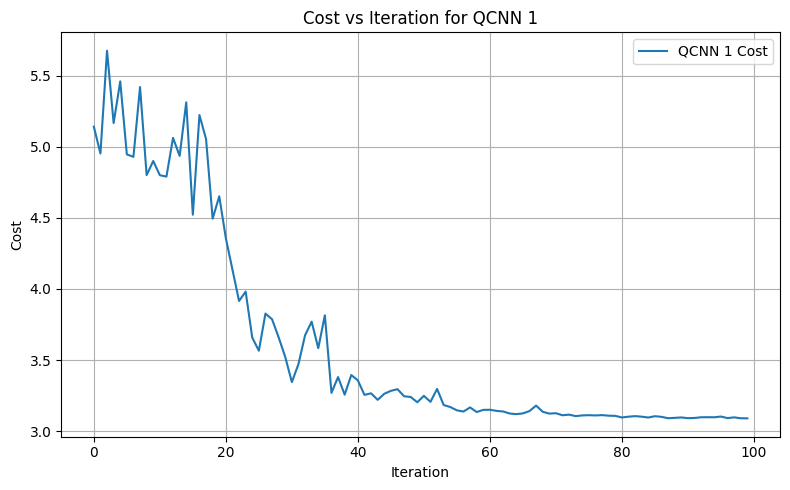

Training QCNN 2...
Training QCNN 3...
Extracting features...
Training classifiers...
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
SVM Classifier trained for 15 classes
Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'
Performing ensemble prediction...
Evaluating results...
Accuracy: 71.11111111111111
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         3
           3       1.00      0.33      0.50         3
           4       1.00      0.67      0.80         3
           5       0.50      1.00      0.67         3
           6       1.00      0.67      0.80         3
           7       0.40      0.67      0.50         3
           8       1.00      0.33      0.50         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00

In [ ]:
import os
import shutil
import numpy as np
import time
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import minimize
from scipy.stats import mode
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit import Parameter
import pickle


cost_history = []

def prepare_dataset(dataset_path='/content/dataset'):
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    subjects = [f'subject{i:02d}' for i in range(1, 16)]
    # Changed test_size to 2 to ensure 2 images per subject for testing
    test_size_per_subject = 3

    for subject in subjects:
        all_items = [f for f in os.listdir(dataset_path)]
        subject_files = [item for item in all_items if item.startswith(subject)]
        # Ensure there are enough files for the split
        if len(subject_files) < test_size_per_subject:
            print(f"Warning: Not enough files for subject {subject} to create test set. Skipping.")
            continue
        train_files, test_files = train_test_split(subject_files, test_size=test_size_per_subject, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(train_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(dataset_path, file), os.path.join(test_dir, file))

    X_train, y_train = process_folder(train_dir)
    X_test, y_test = process_folder(test_dir)
    return X_train, y_train, X_test, y_test

def process_folder(folder_path):
    processed_images = []
    labels = []
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

    subject_ids = set(os.path.basename(file).split('.')[0] for file in image_files)
    subject_to_label = {subject: i for i, subject in enumerate(sorted(subject_ids))}

    for file in image_files:
        file_name = os.path.basename(file)
        subject_id = file_name.split('.')[0]
        label = subject_to_label[subject_id]

        img = Image.open(file).convert('L').resize((48, 48))
        img_array = np.array(img).astype(np.float32) / 255.0 * 2 * np.pi

        patches = [img_array[i:i+2, j:j+2].flatten() for i in range(0, 48, 2) for j in range(0, 48, 2) if i+2 <= 48 and j+2 <= 48]
        processed_images.append(patches)
        labels.append(label)

    return np.array(processed_images), np.array(labels)

def create_qcnn_circuit_1():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.ry(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.ry(Parameter('theta_conv2_0'), 2)
    qc.ry(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.ry(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_2():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rx(Parameter(f'theta_conv1_{i}'), i)
    for i in range(4):
        qc.cx(i, (i+1) % 4)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rx(Parameter('theta_conv2_0'), 2)
    qc.rx(Parameter('theta_conv2_1'), 3)
    qc.cz(2, 3)
    qc.cz(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rx(Parameter('theta_final'), 3)
    return qc

def create_qcnn_circuit_3():
    qc = QuantumCircuit(4)
    for i in range(4):
        qc.ry(Parameter(f'pixel_{i}'), i)
    for i in range(4):
        qc.rz(Parameter(f'theta_conv1_{i}'), i)
    qc.cx(0, 1)
    qc.cx(2, 3)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_0'), 0, 2)
    qc.cx(0, 2)
    qc.crz(Parameter('theta_pool1_1'), 0, 2)
    qc.crz(Parameter('theta_pool1_2'), 1, 3)
    qc.cx(1, 3)
    qc.crz(Parameter('theta_pool1_3'), 1, 3)
    qc.rz(Parameter('theta_conv2_0'), 2)
    qc.rz(Parameter('theta_conv2_1'), 3)
    qc.cx(2, 3)
    qc.cx(3, 2)
    qc.crz(Parameter('theta_pool2_0'), 2, 3)
    qc.cx(2, 3)
    qc.crz(Parameter('theta_pool2_1'), 2, 3)
    qc.rz(Parameter('theta_final'), 3)
    return qc


def execute_circuit(circuit, parameters, backend):
    bound = circuit.assign_parameters(parameters)
    meas = QuantumCircuit(4, 4)
    meas.compose(bound, inplace=True)
    meas.measure([3, 2, 1, 0], [0, 1, 2, 3])  # 4-qubit measurement
    job = backend.run(meas, shots=1024)
    result = job.result()
    return result.get_counts()


def extract_features_from_image(image_patches, circuit, params, backend):
    input_params = list(circuit.parameters)[:4]
    weight_params = list(circuit.parameters)[4:]
    features = []

    for patch in image_patches:
        bindings = {input_params[i]: float(patch[i]) for i in range(4)}
        for i, param in enumerate(weight_params):
            bindings[param] = float(params[i])

        bound = circuit.assign_parameters(bindings)
        meas_circuit = QuantumCircuit(4, 4)
        meas_circuit.compose(bound, inplace=True)
        meas_circuit.measure([3, 2, 1, 0], [0, 1, 2, 3])  # 4-qubit measurement

        job = backend.run(meas_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        probs = np.zeros(16)
        for outcome, count in counts.items():
            idx = int(outcome, 2)
            probs[idx] = count / 1024

        features.append(probs[:15])  # Only keep first 15 for classification

    return np.array(features).flatten()



def extract_all_features(X, circuit, params, backend):
    # X contains a list of images, where each image is a list of patches.
    all_features = []
    for image_patches in X:
         # extract_features_from_image already handles all patches for a single image
        image_features = extract_features_from_image(image_patches, circuit, params, backend)
        all_features.append(image_features)
    return all_features


def train_classifier(X_features, y_labels):
    X_features_reshaped = np.array(X_features) # This should create a (num_images, num_patches) array

    # Changed from LogisticRegression to SVC (Support Vector Classifier)
    # Using RBF kernel which often works well for image classification
    clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale')
    clf.fit(X_features_reshaped, y_labels)

    # Verify the classifier is trained for the correct number of classes
    n_classes = len(np.unique(y_labels))
    print(f"SVM Classifier trained for {n_classes} classes")

    return clf

def cost_function(params, circuit, input_params, weight_params, x_batch, y_batch, backend):
    cost = 0
    epsilon = 1e-9
    for i in range(len(x_batch)):
        image_patches = x_batch[i]
        true_class = y_batch[i]
        patch_cost = 0
        for patch in image_patches:
            param_dict = {input_params[j]: float(patch[j]) for j in range(4)}
            for j, param in enumerate(weight_params):
                param_dict[param] = float(params[j])

            counts = execute_circuit(circuit, param_dict, backend)
            probs = np.zeros(16)
            for outcome, count in counts.items():
                idx = int(outcome, 2)
                probs[idx] = count / 1024

            patch_cost += -np.log(probs[true_class] + epsilon)
        cost += patch_cost / len(image_patches)

    final_cost = cost / len(x_batch)

    # Record cost for plotting
    cost_history.append(final_cost)

    return final_cost


def train_qcnn(circuit, X_train, y_train, backend, maxiter=100):
    all_params = list(circuit.parameters)
    if len(all_params) < 5:
        raise ValueError("Circuit must have at least 4 input parameters and 1 weight parameter.")
    input_params = all_params[:4]
    weight_params = all_params[4:]
    initial_params = np.random.rand(len(weight_params)) * 2 * np.pi - np.pi
    objective = lambda p: cost_function(p, circuit, input_params, weight_params, X_train, y_train, backend)
    result = minimize(objective, initial_params, method='COBYLA', options={'maxiter': maxiter})
    return result.x


def ensemble_predict(X_test, circuits, param_list, classifiers, backend):
    all_preds = []
    for circuit, params, clf in zip(circuits, param_list, classifiers):
        # extract_all_features returns a list of feature lists (one per image)
        features = extract_all_features(X_test, circuit, params, backend)
        # Convert features to a NumPy array for the classifier
        features_array = np.array(features)
        preds = clf.predict(features_array)
        all_preds.append(preds)

    final_preds = []
    for i in range(len(X_test)):
        votes = [model_preds[i] for model_preds in all_preds]

        # Simple fix: convert to a list and use the most common value
        votes_list = list(votes)
        # Count occurrences of each value
        from collections import Counter
        most_common = Counter(votes_list).most_common(1)[0][0]
        final_preds.append(most_common)

    return final_preds


def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100)
    print(classification_report(y_true, y_pred))

def main():
    print("Starting 1-Qubit QCNN Ensemble for 5-Class Classification")
    X_train, y_train, X_test, y_test = prepare_dataset()

    # Check the shapes of X_train and y_train
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")

    backend = Aer.get_backend('qasm_simulator')

    circuit1 = create_qcnn_circuit_1()
    circuit2 = create_qcnn_circuit_2()
    circuit3 = create_qcnn_circuit_3()


    print("Training QCNN 1...")
    params1 = train_qcnn(circuit1, X_train, y_train, backend)
    plt.figure(figsize=(8, 5))
    plt.plot(cost_history, label='QCNN 1 Cost')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost vs Iteration for QCNN 1')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    cost_history.clear()
    print("Training QCNN 2...")
    params2 = train_qcnn(circuit2, X_train, y_train, backend)
    print("Training QCNN 3...")
    params3 = train_qcnn(circuit3, X_train, y_train, backend)

    print("Extracting features...")
    feat1 = extract_all_features(X_train, circuit1, params1, backend)
    feat2 = extract_all_features(X_train, circuit2, params2, backend)
    feat3 = extract_all_features(X_train, circuit3, params3, backend)

    print("Training classifiers...")
    clf1 = train_classifier(feat1, y_train)
    clf2 = train_classifier(feat2, y_train)
    clf3 = train_classifier(feat3, y_train)

    try:
        with open('qcnn_ensemble_models.pkl', 'wb') as f:
            pickle.dump({
                'params1': params1,
                'params2': params2,
                'params3': params3,
                'clf1': clf1,
                'clf2': clf2,
                'clf3': clf3
            }, f)
        print("Trained models and parameters saved successfully to 'qcnn_ensemble_models.pkl'")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Performing ensemble prediction...")
    final_preds = ensemble_predict(X_test, [circuit1, circuit2, circuit3], [params1, params2, params3], [clf1, clf2, clf3], backend)

    print("Evaluating results...")
    evaluate(y_test, final_preds)

if __name__ == "__main__":
    import qiskit
    print(f"Qiskit version: {qiskit.__version__}")
    main()